# Exploratory Data Analysis

## Part 1: Global emissions

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
global_emissions = pd.read_csv("historical_emissions.csv")

**1. Displaying raw data**

In [3]:
global_emissions

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Total excluding LUCF,All GHG,MtCO₂e,97.36,95.41,93.76,84.62,74.80,...,16.91,16.10,15.34,14.44,13.49,13.29,13.48,13.65,15.12,15.20
1,Afghanistan,CAIT,Total including LUCF,All GHG,MtCO₂e,97.36,95.41,93.76,84.62,74.80,...,16.91,16.10,15.34,14.44,13.49,13.29,13.48,13.65,15.12,15.20
2,Afghanistan,CAIT,Energy,All GHG,MtCO₂e,77.72,75.93,74.74,64.68,55.53,...,2.10,2.39,2.51,2.65,2.78,3.10,3.42,3.76,5.33,5.83
3,Afghanistan,CAIT,Industrial Processes,All GHG,MtCO₂e,0.91,0.76,0.59,0.53,0.45,...,0.12,0.11,0.10,0.08,0.07,0.07,0.06,0.06,0.05,0.05
4,Afghanistan,CAIT,Agriculture,All GHG,MtCO₂e,15.28,15.35,15.15,16.22,15.73,...,12.79,11.75,10.95,9.98,8.97,8.54,8.50,8.42,8.41,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Zimbabwe,CAIT,Manufacturing/Construction,All GHG,MtCO₂e,1.12,1.09,1.09,1.07,1.05,...,3.10,2.39,2.28,2.50,2.63,2.40,3.87,4.60,4.99,4.74
2704,Zimbabwe,CAIT,Transportation,All GHG,MtCO₂e,2.24,2.18,2.57,2.64,2.93,...,3.13,2.12,2.14,2.14,2.17,1.75,1.97,2.21,1.59,2.10
2705,Zimbabwe,CAIT,Building,All GHG,MtCO₂e,0.22,0.23,0.22,0.19,0.17,...,0.86,0.60,0.72,0.70,0.80,0.73,0.88,0.89,0.99,0.97
2706,Zimbabwe,CAIT,Other Fuel Combustion,All GHG,MtCO₂e,4.00,3.98,4.06,3.89,3.72,...,5.20,5.09,4.99,5.08,4.63,4.67,4.39,4.03,4.09,3.86


**2. Removing unecessary columns**

Some columns won't be useful for our analysis. Indeed, we are interested in the most recent emissions statistics.


In [4]:
print(global_emissions['Data source'].unique())
print(global_emissions['Gas'].unique())
print(global_emissions['Unit'].unique())

['CAIT']
['All GHG']
['MtCO₂e']


In [5]:
global_emissions_filtered = global_emissions[['Country', 'Sector', '2017']]

In [6]:
global_emissions_filtered.head(14)

,Country,Sector,2017
0,Afghanistan,Total excluding LUCF,97.36
1,Afghanistan,Total including LUCF,97.36
2,Afghanistan,Energy,77.72
3,Afghanistan,Industrial Processes,0.91
4,Afghanistan,Agriculture,15.28
5,Afghanistan,Waste,3.45
6,Afghanistan,Land-Use Change and Forestry,0.00
7,Afghanistan,Bunker Fuels,0.04
8,Afghanistan,Electricity/Heat,0.21
9,Afghanistan,Manufacturing/Construction,3.44


In [7]:
# Let's see if we have all the sectors displayed.
print(global_emissions_filtered['Sector'].unique())

['Total excluding LUCF' 'Total including LUCF' 'Energy'
 'Industrial Processes' 'Agriculture' 'Waste'
 'Land-Use Change and Forestry' 'Bunker Fuels' 'Electricity/Heat'
 'Manufacturing/Construction' 'Transportation' 'Building'
 'Other Fuel Combustion' 'Fugitive Emissions']


In order to reduce the complexity of the dataset, we are going to use only 6 sectors:

Here are the sectors provided in this dataset and how they are computed:
"Main IPCC sectors, including energy sub-sectors. Includes:
- agriculture
- bunker fuels
- energy (sums of)
    - electricity/heat
    - fugitive emissions
    - manufacturing/construction
    - building
    - other fuel combustion
    - transportation
- industrial processes
- land-use change and forestry
- waste


We will make 4 sectors from the above one to reduce the complexity:
- electricity/energy (electricity/heat + fugitive emissions + other fuel combustion + building)
- industry (industrial processes + manufacturing/construction)
- transport (transportation + bunker fuels - used in boats -)
- agriculture and food (agriculture + land-use change and forestry + waste)


We will also remove the sectors that are sums of others (totals and energy)

In [71]:
data = {}
from collections import defaultdict

for index, row in global_emissions_filtered.iterrows():
    
    if row['Country'] not in data:
        data[row['Country']] = defaultdict(lambda:0)
    
    country_data = data[row['Country']]
    
    country_data[row['Sector']] = row['2017']
    
    
rows = []

for key, val in data.items():
    
    country_data = []
    country_data.append(key)
    
    energy = val['Electricity/Heat'] + val['Fugitive Emissions'] + val['Other Fuel Combustion'] + val['Building']
    industry = val['Industrial Processes'] + val['Manufacturing/Construction']
    transport = val['Transportation'] + val['Bunker Fuels']
    agriculture = val['Agriculture'] + val['Land-Use Change and Forestry'] + val['Waste']
    
    country_data.append(energy)
    country_data.append(industry)
    country_data.append(transport)
    country_data.append(agriculture)
    
    rows.append(country_data)

In [72]:
df = pd.DataFrame(rows, columns=['Country', 'Energy', 'Industry', 'Transport', 'Agriculture'])
df

,Country,Energy,Industry,Transport,Agriculture
0,Afghanistan,70.73,4.35,3.59,18.73
1,Albania,1.28,2.60,2.50,3.72
2,Algeria,111.56,29.11,46.22,26.15
3,Andorra,0.00,0.07,0.00,0.03
4,Angola,39.68,2.74,7.70,127.72
...,...,...,...,...,...
190,Vietnam,110.90,100.02,42.23,70.42
191,World,22182.79,9000.29,9080.00,10685.90
192,Yemen,6.57,2.17,2.69,10.76
193,Zambia,6.52,3.21,2.25,484.22


**3. Analysis**

We can now analyse this dataset.
For each sector we have the MtCo2e (Million tons of carbon dioxide equivalent) for all GHB (green house gas) gases.

We will first show a ranking of country and then find which sector contributes the most to emissions.

In [73]:
df['Total'] = df['Energy'] + df['Industry'] + df['Transport'] + df['Agriculture']

In [74]:
df

,Country,Energy,Industry,Transport,Agriculture,Total
0,Afghanistan,70.73,4.35,3.59,18.73,97.40
1,Albania,1.28,2.60,2.50,3.72,10.10
2,Algeria,111.56,29.11,46.22,26.15,213.04
3,Andorra,0.00,0.07,0.00,0.03,0.10
4,Angola,39.68,2.74,7.70,127.72,177.84
...,...,...,...,...,...,...
190,Vietnam,110.90,100.02,42.23,70.42,323.57
191,World,22182.79,9000.29,9080.00,10685.90,50948.98
192,Yemen,6.57,2.17,2.69,10.76,22.19
193,Zambia,6.52,3.21,2.25,484.22,496.20


In [75]:
result = df.sort_values(['Total'], ascending = False)[['Country', 'Total']].head(50)

In [76]:
result.head(20)

,Country,Total
191,World,50948.98
35,China,11924.05
185,United States,5886.61
77,India,3402.29
58,European Union (27),3369.81
143,Russia,2489.00
78,Indonesia,2287.16
23,Brazil,1418.56
85,Japan,1270.49
79,Iran,896.04


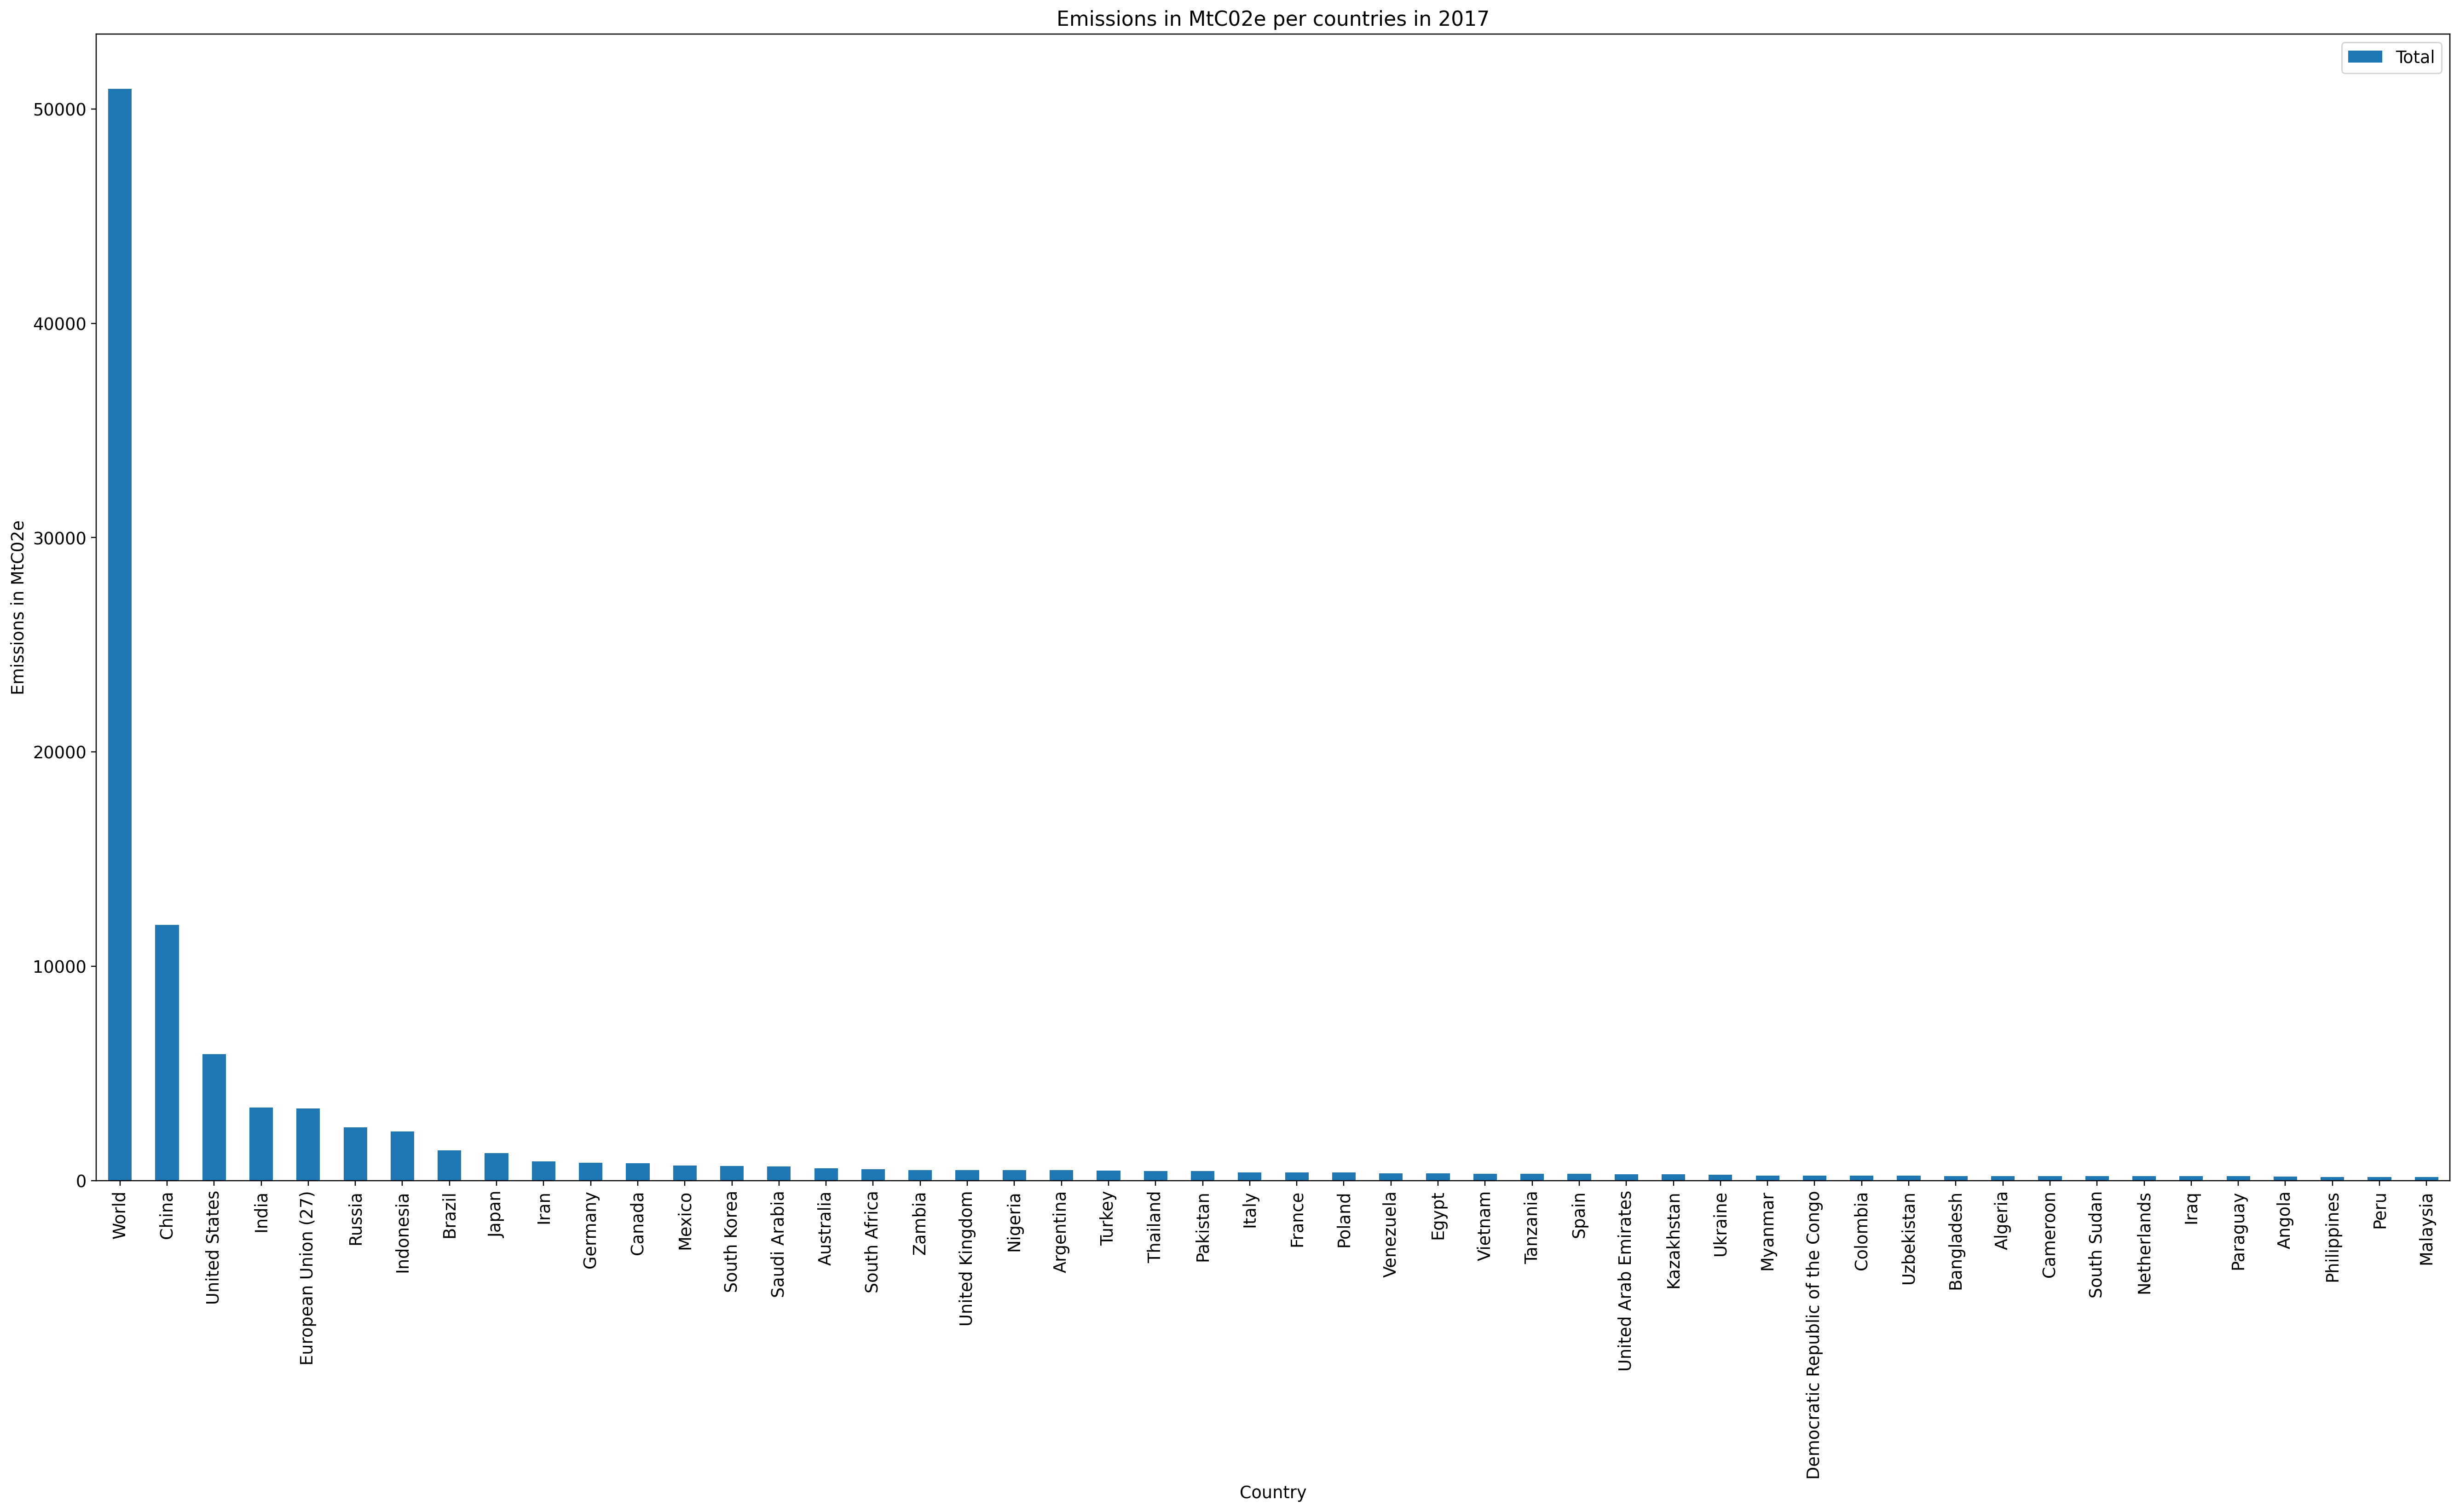

In [77]:
fig = plt.figure(dpi=220)
plt.title("Emissions in MtC02e per countries in 2017")
plt.rcParams.update({'font.size': 12})
plt.ylabel("Emissions in MtC02e")
ax = result.plot.bar(x = 'Country', y ='Total', rot = 90, figsize=(30,15), ax=plt.gca())

We can see that the world emitted 51 billion tons of Co2 equivalent gases in 2017.

Let's now look at sectors.

In [78]:
energy = df['Energy'].sum()
industry = df['Industry'].sum()
transport = df['Transport'].sum()
agriculture = df['Agriculture'].sum()

total = energy + industry + transport + agriculture
energy_p = energy / total
industry_p = industry / total
transport_p = transport / total
agriculture_p = agriculture / total

<BarContainer object of 4 artists>

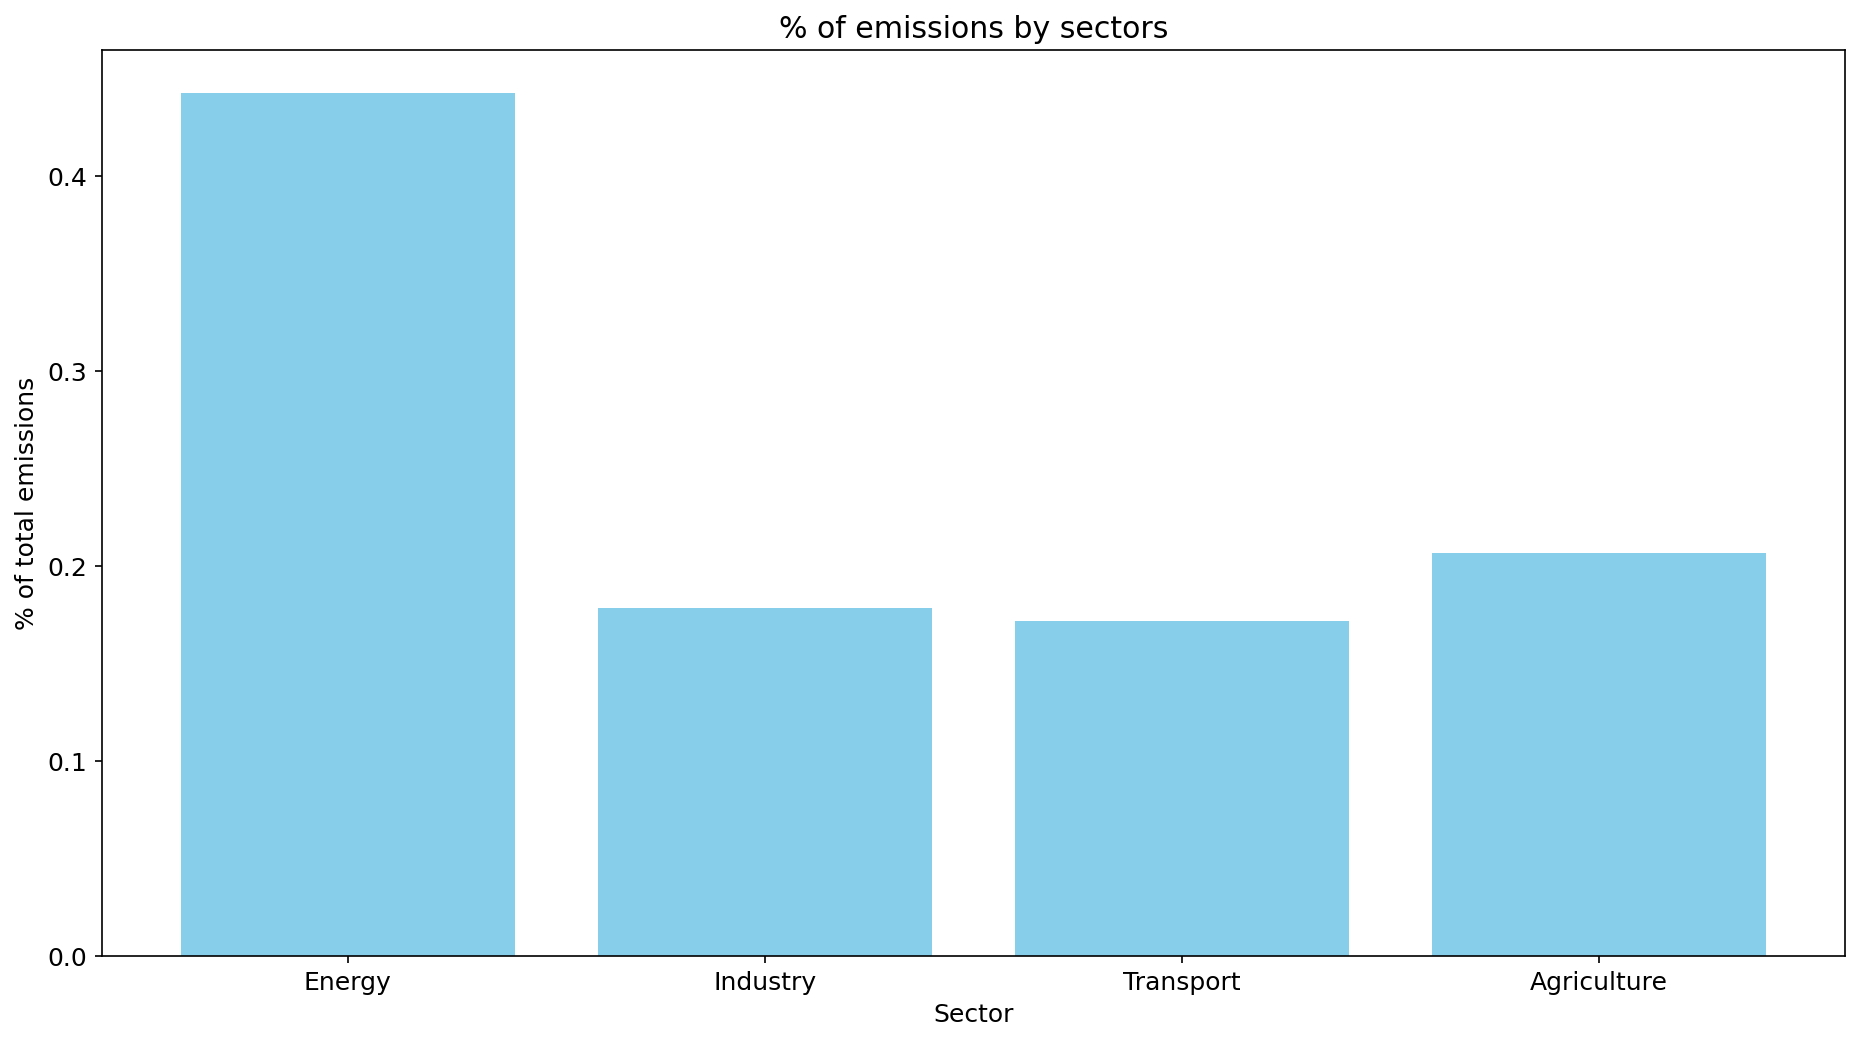

In [79]:
fig = plt.figure(figsize=(15, 8), dpi=150)
plt.title("% of emissions by sectors")
plt.xlabel("Sector")
plt.ylabel("% of total emissions")
plt.bar(x = ['Energy', 'Industry', 'Transport', 'Agriculture'], height = [energy_p, industry_p, transport_p, agriculture_p], color = "skyblue")